<a href="https://colab.research.google.com/github/sazio/Transients/blob/master/Python/DynamicTimeWarping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#!pip install dtaidistance
#!pip install traja

In [15]:
from dtaidistance import dtw, dtw_ndim
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
import pandas as pd 
import traja

In [3]:
# Fast C version
s1 = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0], dtype=np.double)
s2 = np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0], dtype=np.double)
d = dtw.distance_fast(s1, s2, use_pruning=True)
print(d)

1.4142135623730951


In [4]:
s1 = np.array([[0, 0],
               [0, 1],
               [2, 1],
               [0, .5],
               [0, 0]], dtype=np.double)
s2 = np.array([[0, 0],
               [2, 1],
               [8, 1],
               [10, 0]], dtype=np.double)
d = dtw_ndim.distance(s1, s2, use_pruning=True)

print(d)

12.854960132182441


In [5]:
from dtaidistance import dtw_ndim

def nDTW(s1,s2):
  """
  Normalized Dynamic Time Warping as in "G.Ilharco et al. 2019"
    s1 = sequence 1 
    s2 = sequence 2 
    d_th = success distance threshold
  
  """
  norm_ = s1.shape[0] #mmmh
  DTW = dtw_ndim.distance(s1, s2, use_pruning= True, use_c=True)
  d_th = 0.01#(norm_ + s2.shape[0])/2

  return np.exp(-(DTW)/(norm_*d_th))

In [7]:
nDTW(s1,s2)

2.2041187555868205e-112

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path_to_files = "drive/MyDrive/JamesSimoneSpatial/TrackFilesCue/CueCsv/Track/"

In [10]:
seq1 = pd.read_csv(path_to_files + "C02A2_Track.csv", header = None)
seq1 = seq1.loc[:,1:2]
#seq1.head()
seq1 = seq1.values.astype(np.double)

In [11]:
seq2 = pd.read_csv(path_to_files + "C02A3_Track.csv", header = None)
seq2 = seq2.loc[:,1:2]
#seq2.head()
seq2 = seq2.values.astype(np.double)

In [16]:
seq3 = pd.read_csv(path_to_files + "C14C3_Track.csv", header = None)
seq3 = seq3.loc[:,1:2]
#seq2.head()
seq3 = seq3.values.astype(np.double)

In [17]:
nDTW(seq1, seq2)

0.41259763822899354

In [18]:
dtw_ndim.distance(seq1, seq2, use_c = True, use_pruning= True)

54.94062589785752

In [20]:
dtw_ndim.distance(seq2, seq3, use_c = True, use_pruning= True)

54.077343002473484

In [30]:
## Using traja
seq1t = traja.TrajaDataFrame(seq1, columns = ["x","y"])
seq2t = traja.TrajaDataFrame(seq2, columns = ["x","y"])
seq3t = traja.TrajaDataFrame(seq3, columns = ["x","y"])

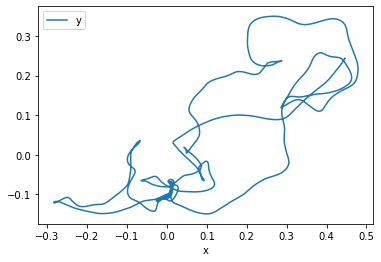

In [34]:
traja.smooth_sg(seq1t).plot(x = "x", y = "y")

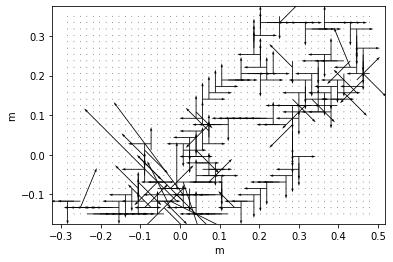

In [35]:
traja.plot_quiver(seq1t, bins=32)